# House Price Prediction

**Author**: Arnav Sharma - arnav.sharma2264@gmail.com - github.com/ArnavSharma2
**Date**: 2025-08-9 
**Description**: WIP

## Table of Contents
1. [Project Setup](#1-project-setup)
2. [Data Loading](#2-data-loading)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
4. [Data Preprocessing](#4-data-preprocessing)
5. [Feature Engineering](#5-feature-engineering)
6. [Model Training](#6-model-training)
7. [AutoML](#7-automl)
8. [Deep Learning](#8-deep-learning)
9. [Model Evaluation](#9-model-evaluation)
10. [Hyperparameter Tuning](#10-hyperparameter-tuning)
11. [Model Interpretation](#11-model-interpretation)
12. [Model Deployment](#12-model-deployment)
13. [Conclusion and Next Steps](#13-conclusion-and-next-steps)

## 1. Project Setup
Install and import necessary libraries, set random seeds for reproducibility, and configure project settings.

In [26]:
# Install required packages (uncomment to install)
# !pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier, XGBRegressor
from flaml import AutoML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import shap
from skopt import BayesSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define project-specific variables
DATA_PATH = "/Users/aps/Desktop/ML-DL-Projects/01-housepriceprediction/Dataset/HousePrices.csv"  # Update with your dataset path
TARGET_COLUMN = "price"  # Update with your target column name
TASK_TYPE = "regression"  # Options: "classification" or "regression"
MODEL_SAVE_PATH = "model.pkl"

## 2. Data Loading
Load the dataset and perform initial checks for data integrity.

In [27]:
def load_data(file_path):
    """
    Load dataset from a given file path.
    
    Parameters:
    file_path (str): Path to the dataset (CSV, Excel, etc.)
    
    Returns:
    pandas.DataFrame: Loaded dataset
    """
    try:
        if file_path.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_path.endswith('.xlsx'):
            data = pd.read_excel(file_path)
        else:
            raise ValueError("Unsupported file format")
        
        print("Data loaded successfully!")
        print(f"Shape: {data.shape}")
        print("\nFirst 5 rows:")
        print(data.head())
        print("\nData Info:")
        print(data.info())
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load the dataset
df = load_data(DATA_PATH)
if df is None:
    raise SystemExit("Data loading failed. Exiting.")

Data loaded successfully!
Shape: (4600, 18)

First 5 rows:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140         

## 3. Exploratory Data Analysis (EDA)
Understand the dataset through visualizations and statistical summaries.


Summary Statistics:
                       date         price     bedrooms    bathrooms  \
count                  4600  4.600000e+03  4600.000000  4600.000000   
unique                   70           NaN          NaN          NaN   
top     2014-06-23 00:00:00           NaN          NaN          NaN   
freq                    142           NaN          NaN          NaN   
mean                    NaN  5.519630e+05     3.400870     2.160815   
std                     NaN  5.638347e+05     0.908848     0.783781   
min                     NaN  0.000000e+00     0.000000     0.000000   
25%                     NaN  3.228750e+05     3.000000     1.750000   
50%                     NaN  4.609435e+05     3.000000     2.250000   
75%                     NaN  6.549625e+05     4.000000     2.500000   
max                     NaN  2.659000e+07     9.000000     8.000000   

         sqft_living      sqft_lot       floors   waterfront         view  \
count    4600.000000  4.600000e+03  4600.000000  

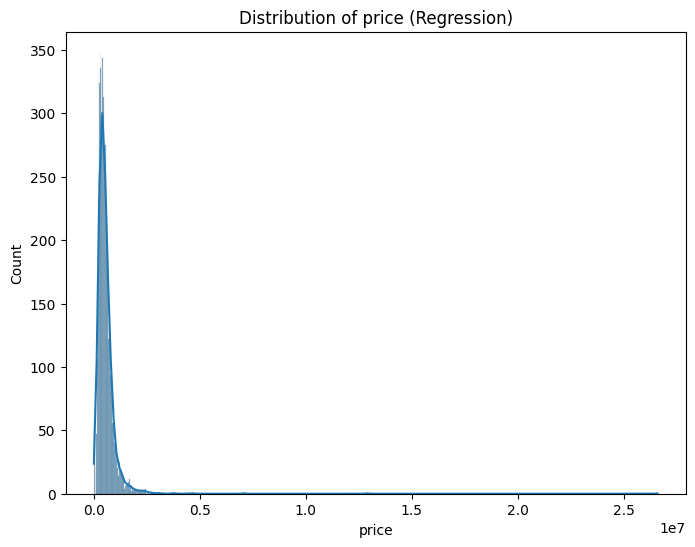

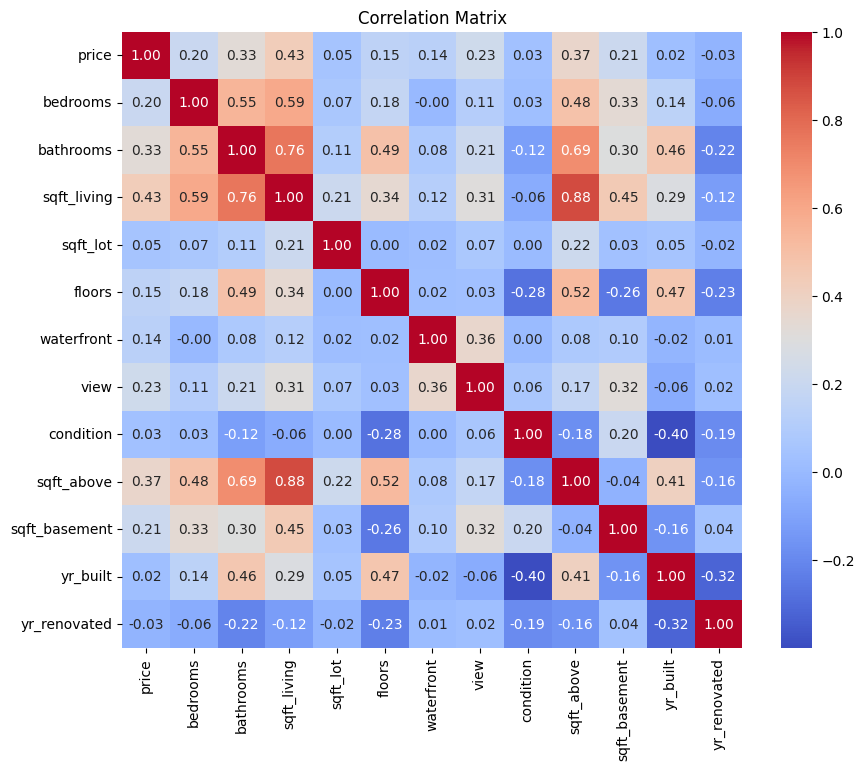

In [28]:
def perform_eda(df, target_column):
    """
    Perform exploratory data analysis on the dataset.
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    target_column (str): Name of the target column
    """
    # Summary statistics
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    
    # Missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Distribution of target variable
    plt.figure(figsize=(8, 6))
    if TASK_TYPE == "classification":
        sns.countplot(x=target_column, data=df)
        plt.title(f"Distribution of {target_column}")
    else:
        sns.histplot(df[target_column], kde=True)
        plt.title(f"Distribution of {target_column} (Regression)")
    plt.show()
    
    # Correlation matrix (for numeric columns)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()
    
    # Pairplot for numeric features (optional, for smaller datasets)
    # sns.pairplot(df[numeric_cols])
    # plt.show()

# Perform EDA
perform_eda(df, TARGET_COLUMN)

## 4. Data Preprocessing
Clean the data and prepare it for modeling.

In [29]:
def preprocess_data(df, target_column):
    """
    Preprocess the dataset (handle missing values, encode categorical variables, etc.).
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    target_column (str): Name of the target column
    
    Returns:
    pandas.DataFrame: Preprocessed dataset
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # removing unimportant features
    dropper = ['yr_renovated', 'yr_built', 'condition', 'sqft_lot', 'country', 'waterfront', 'floors', 'date']
    X = X.drop(dropper, axis=1)
    # Handle missing values
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    
    # Impute numeric columns with median
    for col in numeric_cols:
        X[col].fillna(X[col].median(), inplace=True)
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        X[col].fillna(X[col].mode()[0], inplace=True)
    
    # Encode categorical variables
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])
    
    # Encode target variable (for classification)
    if TASK_TYPE == "classification":
        y = le.fit_transform(y)
    
    print("Data preprocessing completed!")
    return X, y

# Preprocess data
X, y = preprocess_data(df, TARGET_COLUMN)
X

Data preprocessing completed!


,bedrooms,bathrooms,sqft_living,view,sqft_above,sqft_basement,street,city,statezip
0,3.0,1.50,1340,0,1340,0,1522,36,62
1,5.0,2.50,3650,4,3370,280,3899,35,58
2,3.0,2.00,1930,0,1930,0,2291,18,26
3,3.0,2.25,2000,0,1000,1000,4263,3,7
4,4.0,2.50,1940,0,1140,800,4352,31,31
...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,0,1510,0,3447,35,62
4596,3.0,2.50,1460,0,1460,0,960,3,6
4597,3.0,2.50,3010,0,3010,0,4033,32,37
4598,4.0,2.00,2090,0,1070,1020,3498,35,71


## 5. Feature Engineering
Create new features and scale the data.

In [30]:
from sklearn.preprocessing import OneHotEncoder
def feature_engineering(X):
    # """
    # Perform feature engineering (e.g., creating new features, scaling).
    
    # Parameters:
    # X (pandas.DataFrame): Feature dataset
    
    # Returns:
    # pandas.DataFrame: Engineered feature dataset
    # """
    # # Example: Create interaction features (customize as needed)
    # if 'feature1' in X.columns and 'feature2' in X.columns:
    #     X['feature1_feature2_interaction'] = X['feature1'] * X['feature2']
    
    # # Scale numeric features
    # scaler = StandardScaler()
    # numeric_cols = X.select_dtypes(include=[np.number]).columns
    # X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    
    # print("Feature engineering completed!")
    # return X, scaler

    # Implementing One Hot Encoder on City and Statezip
    ohe = OneHotEncoder(drop=None, sparse_output=False)
    city_ohe = ohe.fit_transform(X[['city']])

    city_df = pd.DataFrame(city_ohe, columns=ohe.get_feature_names_out(['city']), index=X.index)

    return pd.concat([X.drop('city', axis=1), city_df], axis=1)



# Perform feature engineering
X = feature_engineering(X)

## 6. AutoML
Use an AutoML framework (FLAML) to automatically select and tune the best model for the task.

In [31]:
from flaml import AutoML

def run_automl(X_train, y_train, task_type, time_budget=60):
    """
    Run AutoML using FLAML to automatically select and tune the best model.
    
    Parameters:
    X_train (pandas.DataFrame): Training features
    y_train (numpy.array): Training target
    task_type (str): 'classification' or 'regression'
    time_budget (int): Time budget in seconds for AutoML (default: 60)
    
    Returns:
    model: Best AutoML model
    """
    automl = AutoML()
    automl_settings = {
        "time_budget": time_budget,  # Time budget in seconds
        "metric": "accuracy" if task_type == "classification" else "rmse",
        "task": task_type,
        "log_file_name": "automl.log",
        "n_jobs": -1,
        "random_state": 42
    }
    
    automl.fit(X_train=X_train, y_train=y_train, **automl_settings)
    print(f"Best AutoML model: {automl.best_estimator}")
    print(f"Best configuration: {automl.best_config}")
    
    return automl

# Run AutoML
#automl_model = run_automl(X_train, y_train, TASK_TYPE, time_budget=60)


## 7. Model Training
Split data and train multiple models.

In [32]:
def train_models(X, y):
    """
    Train multiple machine learning models, AutoML, and a deep learning model.
    
    Parameters:
    X (pandas.DataFrame): Features
    y (numpy.array): Target
    
    Returns:
    dict: Trained models (including AutoML and Deep Learning)
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize models based on task type
    models = {}
    if TASK_TYPE == "classification":
        models['Logistic Regression'] = LogisticRegression(random_state=42)
        models['Random Forest'] = RandomForestClassifier(random_state=42)
        models['XGBoost'] = XGBClassifier(random_state=42)
    else:
        models['Linear Regression'] = LinearRegression()
        models['Random Forest'] = RandomForestRegressor(random_state=42)
        models['XGBoost'] = XGBRegressor(random_state=42)
    
    # Train manual models
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(f"{name} trained successfully!")
    
    # Run AutoML
    #automl_model = run_automl(X_train, y_train, TASK_TYPE, time_budget=60)
    #models['AutoML'] = automl_model

    
    return models, X_train, X_test, y_train, y_test

# Train models
models, X_train, X_test, y_train, y_test = train_models(X, y)

Linear Regression trained successfully!
Random Forest trained successfully!
XGBoost trained successfully!


## 8. Model Evaluation
Evaluate models using appropriate metrics.

In [33]:
def evaluate_models(models, X_test, y_test):
    """
    Evaluate trained models using appropriate metrics.
    
    Parameters:
    models (dict): Dictionary of trained models
    X_test (pandas.DataFrame): Test features
    y_test (numpy.array): Test target
    """
    results = {}
    
    for name, model in models.items():
        if name == 'Deep Learning':
            y_pred = model.predict(X_test)
            y_pred = (y_pred > 0.5).astype(int).flatten() if TASK_TYPE == "classification" else y_pred.flatten()
        else:
            y_pred = model.predict(X_test)
        
        if TASK_TYPE == "classification":
            results[name] = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, average='weighted'),
                'Recall': recall_score(y_test, y_pred, average='weighted'),
                'F1 Score': f1_score(y_test, y_pred, average='weighted')
            }
        else:
            results[name] = {
                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                'R2 Score': r2_score(y_test, y_pred)
            }
    
    # Display results
    results_df = pd.DataFrame(results).T
    print("\nModel Evaluation Results:")
    print(results_df)
    
    return results_df

# Evaluate models
results_df = evaluate_models(models, X_test, y_test)


Model Evaluation Results:
                            RMSE  R2 Score
Linear Regression  988897.360587  0.041112
Random Forest      985584.610790  0.047526
XGBoost            980423.865824  0.057475


## 9. Hyperparameter Tuning
Optimize the best-performing model using Bayesian optimization.

In [34]:
def tune_best_model(X_train, y_train, best_model_name, models):
    """
    Perform hyperparameter tuning on the best model (excluding AutoML and Deep Learning).
    
    Parameters:
    X_train (pandas.DataFrame): Training features
    y_train (numpy.array): Training target
    best_model_name (str): Name of the best model
    models (dict): Dictionary of trained models
    
    Returns:
    model: Tuned model
    """
    # Define hyperparameter search space (customize as needed)
    param_space = {
        'Random Forest': {
            'n_estimators': (10, 200),
            'max_depth': (3, 20),
            'min_samples_split': (2, 10)
        },
        'XGBoost': {
            'n_estimators': (10, 200),
            'max_depth': (3, 20),
            'learning_rate': (0.01, 0.3, 'log-uniform')
        }
    }
    
    if best_model_name in param_space:
        bayes_cv = BayesSearchCV(
            estimator=models[best_model_name],
            search_spaces=param_space[best_model_name],
            n_iter=20,
            cv=5,
            n_jobs=-1,
            random_state=42
        )
        bayes_cv.fit(X_train, y_train)
        print(f"Best parameters for {best_model_name}: {bayes_cv.best_params_}")
        return bayes_cv.best_estimator_
    elif best_model_name in ['AutoML', 'Deep Learning']:
        print(f"{best_model_name} model is already tuned or does not support BayesSearchCV. Skipping additional tuning.")
        return models[best_model_name]
    else:
        print(f"No tuning defined for {best_model_name}")
        return models[best_model_name]

# Select the best model (based on evaluation metrics)
best_model_name = results_df.idxmax()['Accuracy' if TASK_TYPE == "classification" else 'R2 Score']
tuned_model = tune_best_model(X_train, y_train, best_model_name, models)

Best parameters for XGBoost: OrderedDict({'learning_rate': 0.13926081560489573, 'max_depth': 3, 'n_estimators': 172})


## 10. Model Interpretation
Interpret the model using SHAP values.

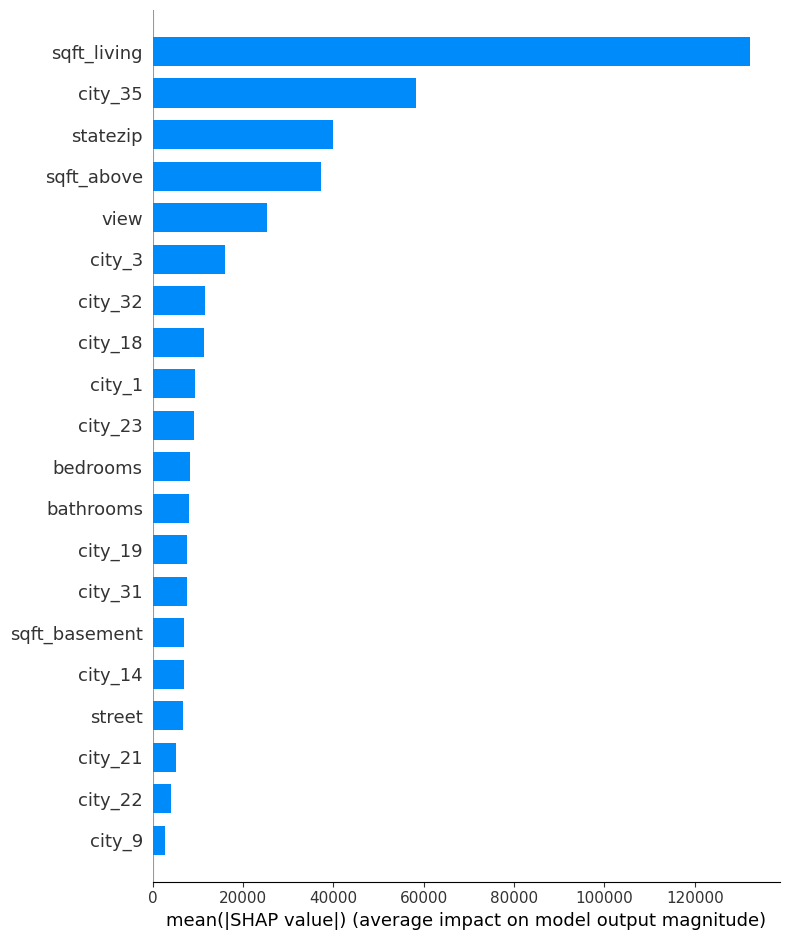

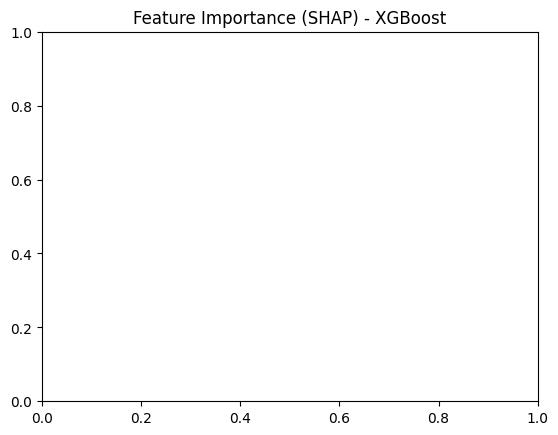

In [35]:
def interpret_model(model, X_train, model_name):
    """
    Interpret the model using SHAP values.
    
    Parameters:
    model: Trained model
    X_train (pandas.DataFrame): Training features
    model_name (str): Name of the model
    """
    try:
        if model_name in ['Random Forest', 'XGBoost']:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_train)
        elif model_name == 'AutoML':
            # Check if the AutoML model is tree-based
            if 'rf' in model.best_estimator.lower() or 'xgboost' in model.best_estimator.lower():
                explainer = shap.TreeExplainer(model.model)
                shap_values = explainer.shap_values(X_train)
            else:
                explainer = shap.KernelExplainer(model.predict, X_train)
                shap_values = explainer.shap_values(X_train)
        elif model_name == 'Deep Learning':
            explainer = shap.DeepExplainer(model, X_train)
            shap_values = explainer.shap_values(X_train.to_numpy())
        else:
            explainer = shap.KernelExplainer(model.predict, X_train)
            shap_values = explainer.shap_values(X_train)
        
        # Summary plot
        shap.summary_plot(shap_values, X_train, plot_type="bar")
        plt.title(f"Feature Importance (SHAP) - {model_name}")
        plt.show()
    except Exception as e:
        print(f"SHAP interpretation failed for {model_name}: {e}")

# Interpret the best model
interpret_model(tuned_model, X_train, best_model_name)

## 11. Model Deployment
Save the model and create a prediction function for deployment.

In [36]:
def save_model(model, scaler, path, model_name):
    """
    Save the trained model and scaler.
    
    Parameters:
    model: Trained model
    scaler: Fitted scaler
    path (str): Path to save the model
    model_name (str): Name of the model
    """
    if model_name == 'Deep Learning':
        model.save(path.replace('.pkl', '.h5'))  # Save Keras model in HDF5 format
        joblib.dump({'scaler': scaler}, path.replace('.pkl', '_scaler.pkl'))
        print(f"Deep Learning model saved to {path.replace('.pkl', '.h5')}")
        print(f"Scaler saved to {path.replace('.pkl', '_scaler.pkl')}")
    else:
        joblib.dump({'model': model, 'scaler': scaler}, path)
        print(f"Model and scaler saved to {path}")

def predict_new_data(model, scaler, new_data, model_name):
    """
    Make predictions on new data.
    
    Parameters:
    model: Trained model
    scaler: Fitted scaler
    new_data (pandas.DataFrame): New data for prediction
    model_name (str): Name of the model
    
    Returns:
    numpy.array: Predictions
    """
    # Preprocess new data
    numeric_cols = new_data.select_dtypes(include=[np.number]).columns
    new_data[numeric_cols] = scaler.transform(new_data[numeric_cols])
    
    # Make predictions
    if model_name == 'Deep Learning':
        predictions = model.predict(new_data).flatten()
        if TASK_TYPE == "classification":
            predictions = (predictions > 0.5).astype(int)
    else:
        predictions = model.predict(new_data)
    return predictions

# Save the model
save_model(tuned_model, scaler, MODEL_SAVE_PATH, best_model_name)

# Example: Predict on new data (replace with actual new data)
# new_data = pd.DataFrame(...)  # Load or create new data
# predictions = predict_new_data(tuned_model, scaler, new_data, best_model_name)
# print("Predictions on new data:", predictions)

Model and scaler saved to model.pkl


## 12. Conclusion and Next Steps
- **Summary**: Summarize the findings, best model performance (including AutoML and Deep Learning results), and key insights from EDA and model interpretation.
- **Next Steps**: Consider additional feature engineering, trying other AutoML frameworks, experimenting with different neural network architectures, or deploying the model in a production environment.
- **Monitoring**: Plan for model monitoring and retraining to handle data drift.

```python
print("End-to-End ML and Deep Learning Project Completed!")
```

In [37]:
print("End-to-End ML and Deep Learning Project Completed!")

End-to-End ML and Deep Learning Project Completed!
